<a href="https://colab.research.google.com/github/angelanto0127/task4---Sentiment-Analysis/blob/main/Sentiment_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -q nltk scikit-learn


In [10]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('movie_reviews')
nltk.download('punkt_tab') # Added to download the missing resource


import random
import pandas as pd
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.classify import SklearnClassifier
from sklearn.naive_bayes import MultinomialNB
from nltk import classify, NaiveBayesClassifier

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [3]:
documents = [(list(movie_reviews.words(fileid)), category)
             for category in movie_reviews.categories()
             for fileid in movie_reviews.fileids(category)]
random.shuffle(documents)


In [4]:
all_words = nltk.FreqDist(w.lower() for w in movie_reviews.words())
word_features = list(all_words)[:2000]  # Top 2000 words

def document_features(document):
    words = set(document)
    features = {}
    for word in word_features:
        features[f'contains({word})'] = (word in words)
    return features

# Create feature sets
featuresets = [(document_features(d), c) for (d, c) in documents]


In [5]:
train_set, test_set = featuresets[:1500], featuresets[1500:]
classifier = NaiveBayesClassifier.train(train_set)


In [6]:
print("Accuracy:", classify.accuracy(classifier, test_set))
classifier.show_most_informative_features(10)


Accuracy: 0.82
Most Informative Features
   contains(outstanding) = True              pos : neg    =      9.0 : 1.0
   contains(wonderfully) = True              pos : neg    =      7.2 : 1.0
         contains(mulan) = True              pos : neg    =      7.0 : 1.0
        contains(seagal) = True              neg : pos    =      5.8 : 1.0
        contains(wasted) = True              neg : pos    =      5.8 : 1.0
        contains(poorly) = True              neg : pos    =      5.7 : 1.0
     contains(laughable) = True              neg : pos    =      5.7 : 1.0
         contains(damon) = True              pos : neg    =      5.6 : 1.0
          contains(lame) = True              neg : pos    =      5.6 : 1.0
         contains(awful) = True              neg : pos    =      4.8 : 1.0


In [9]:
url = "https://zenodo.org/record/10157504/files/data_rt.csv?download=1"


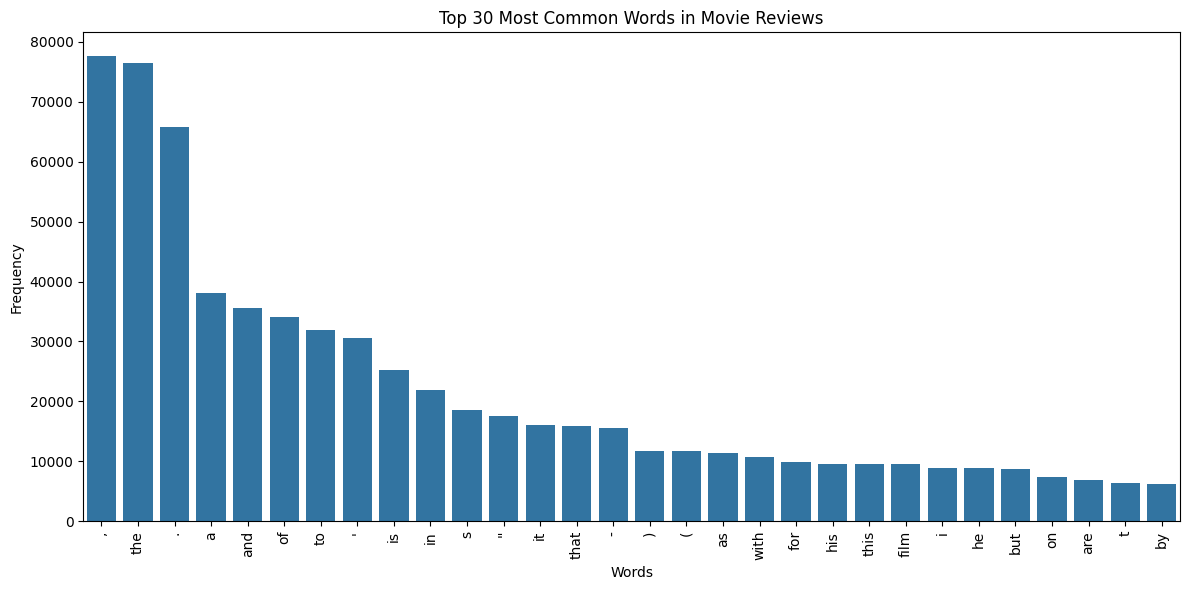

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get the most common words and their frequencies
most_common_words = all_words.most_common(30) # Get the top 30 most common words

# Create a bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x=[word for word, freq in most_common_words], y=[freq for word, freq in most_common_words])
plt.xticks(rotation=90)
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.title("Top 30 Most Common Words in Movie Reviews")
plt.tight_layout()
plt.show()